In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\91976\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [4]:
import pandas as pd

In [5]:
books = pd.read_csv(f'{path}/books.csv')

In [6]:
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [9]:
books.describe(include="all")

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6810,6810,2381,6738,6711,6481,6548,6804.000000,6767.000000,6767.000000,6.767000e+03
unique,NaN,6810,6398,2009,3780,567,6481,6474,NaN,NaN,NaN,NaN
top,NaN,9042003405,The Lord of the Rings,A Novel,Agatha Christie,Fiction,http://books.google.com/books/content?id=2lVyR...,No Marketing Blurb,NaN,NaN,NaN,NaN
freq,NaN,1,11,226,37,2588,1,6,NaN,NaN,NaN,NaN
mean,9.780677e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.000000,4.130000,420.000000,5.992500e+03


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


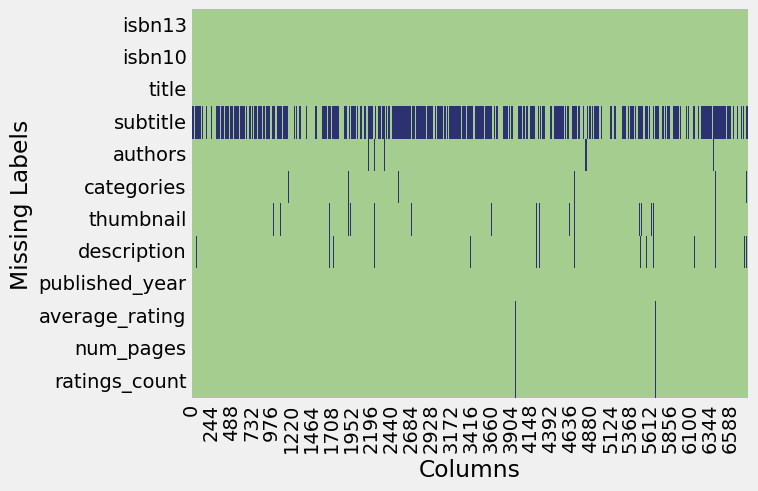

In [22]:
ax = plt.axes()
sns.color_palette("tab10")
sns.heatmap(books.isna().transpose(),cbar=False,ax=ax,cmap="crest")

plt.xlabel("Columns")
plt.ylabel("Missing Labels")

plt.show()

In [40]:
import numpy as np

books["missing_description"] = np.where(books['description'].isna(),1,0)
books["age_of_book"] = 2025 - books["published_year"]

In [42]:
columns_of_interest = ["num_pages","age_of_book","missing_description","age_of_book"]

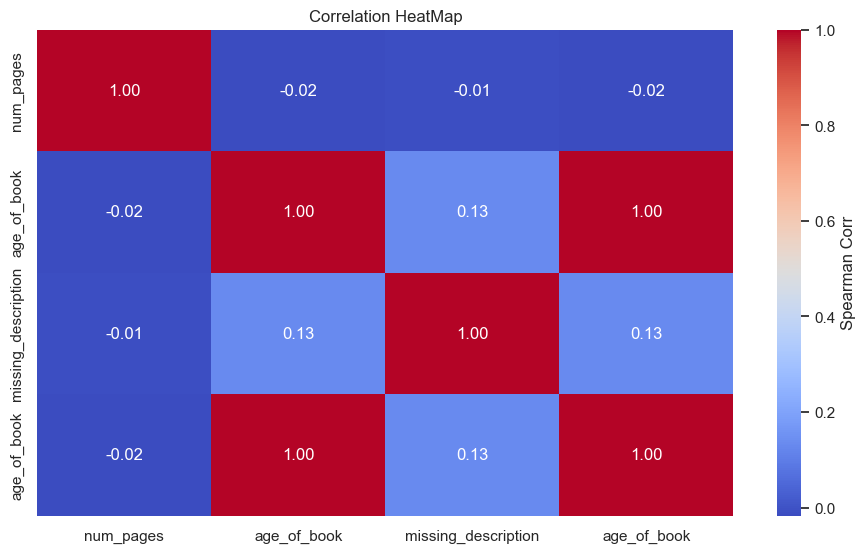

In [46]:
correlation_matrix = books[columns_of_interest].corr(method="spearman")
sns.set_theme(style="white")
plt.figure(figsize=(10,6))
heatmap_corr = sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",cbar_kws={"label":"Spearman Corr"})
heatmap_corr.set_title("Correlation HeatMap")
plt.show()

In [47]:
books_missing = books[
   ~(books["num_pages"].isna()) |
    ~(books["average_rating"].isna()) | 
    ~(books["missing_description"].isna()) |
    ~(books["published_year"].isna())
]

In [49]:
books_missing.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0


In [50]:
books_missing["categories"].value_counts().reset_index().sort_values("count",ascending=False)

,categories,count
0,Fiction,2588
1,Juvenile Fiction,538
2,Biography & Autobiography,401
3,History,264
4,Literary Criticism,166
...,...,...
554,Courage,1
553,Otherland (Imaginary place),1
552,Conan (Fictitious character),1
551,Elves,1


In [56]:
books_missing["categories"].value_counts().reset_index().sort_values("count",ascending=False)


,categories,count
0,Fiction,2588
1,Juvenile Fiction,538
2,Biography & Autobiography,401
3,History,264
4,Literary Criticism,166
...,...,...
554,Courage,1
553,Otherland (Imaginary place),1
552,Conan (Fictitious character),1
551,Elves,1


In [57]:
books_missing["words_in_description"] = books_missing["description"].str.split().str.len()


In [59]:
books_missing['words_in_description']

0       199.0
1       205.0
2        14.0
3        57.0
4        45.0
        ...  
6805    174.0
6806      NaN
6807      NaN
6808    245.0
6809     20.0
Name: words_in_description, Length: 6810, dtype: float64

In [60]:
books_missing.loc[books_missing["words_in_description"].between(1,4),"description"]

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [61]:
books_missing.loc[books_missing["words_in_description"].between(5,14),"description"]

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 312, dtype: object

In [62]:
books_missing.loc[books_missing["words_in_description"].between(15,24),"description"]

10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
36      A magical and fantastic collection of early st...
57      A young drifter finds more than he bargained f...
68      A new 'The Doors of Perception' for the 21st c...
                              ...                        
6767    Everything from the fingerprints of the gods t...
6782    Displays one of America's leading physicist's ...
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 950, dtype: object

In [63]:
books_missing.loc[books_missing["words_in_description"].between(25,34),"description"]

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6798    Presents the adventures of a new group of hero...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1233, dtype: object

In [64]:
books_missing_25_words = books_missing[books_missing["words_in_description"]>=25]

In [ ]:
 books_missing_25_words.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45.0
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75.0


In [69]:
books_missing_25_words["title_and_subtitle"] = (np.where(books_missing_25_words["subtitle"].isna(),books_missing_25_words["title"],books_missing_25_words[["title","subtitle"]].astype(str).agg(":".join,axis=1))
)

C:\Users\91976\AppData\Local\Temp\ipykernel_20944\1878734773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_25_words["title_and_subtitle"] = (np.where(books_missing_25_words["subtitle"].isna(),books_missing_25_words["title"],books_missing_25_words[["title","subtitle"]].astype(str).agg(":".join,axis=1))


In [77]:
books_missing_25_words.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5230 entries, 0 to 6808
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   isbn13                5230 non-null   int64  
 1   isbn10                5230 non-null   object 
 2   title                 5230 non-null   object 
 3   subtitle              1825 non-null   object 
 4   authors               5198 non-null   object 
 5   categories            5198 non-null   object 
 6   thumbnail             5061 non-null   object 
 7   description           5230 non-null   object 
 8   published_year        5228 non-null   float64
 9   average_rating        5198 non-null   float64
 10  num_pages             5198 non-null   float64
 11  ratings_count         5198 non-null   float64
 12  missing_description   5230 non-null   int64  
 13  age_of_book           5228 non-null   float64
 14  words_in_description  5230 non-null   float64
 15  title_and_subtitle    5230

In [80]:
books_missing_25_words["tagged_description"] = books_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)


C:\Users\91976\AppData\Local\Temp\ipykernel_20944\205713499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_25_words["tagged_description"] = books_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)


In [82]:
(
    books_missing_25_words
    .drop(["subtitle", "missing_description", "age_of_book", "words_in_description"], axis=1)
    .to_csv("books_cleaned.csv", index = False)
)